In [ ]:
import numpy as np                     # linear algebra
import pandas as pd                    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt        # ploting graph # ploting lines in graph
%matplotlib inline
import seaborn as sns                  # data visualisation
import random                          # to generate random values
import plotly.express as px            # create interactive plotes with very little code
import plotly.offline as pyo           # to view the code offline

In [ ]:
df=pd.read_csv('/content/UberDataset (1).csv')

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.CATEGORY.nunique()

2

In [ ]:
#checking datatype
print("Datatypes of all coloumns:")
print(df.dtypes)

Datatypes of all coloumns:
START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object


**Exploratory Data Analysis**

In [ ]:
df.CATEGORY.unique()

array(['Business', 'Personal', nan], dtype=object)

In [ ]:
df.PURPOSE.unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [ ]:
average_distance_travelled =df.groupby('PURPOSE')['MILES'].mean()
average_distance_travelled

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

**Comparison with the average distance travelled by passengers**

Text(0.5, 1.0, 'Comparison of values with Average')

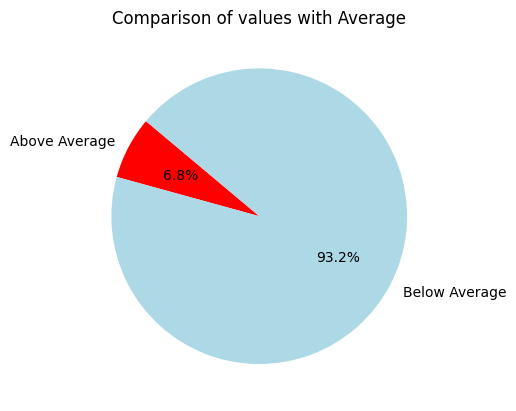

In [ ]:
average_value = df['MILES'].mean()

# compare values with the average and categorise them
above_avg = df[df['MILES'] > average_value].shape[0]
below_avg = df[df['MILES'] <= average_value].shape[0]

# data for the pie chart
sizes = [above_avg, below_avg]
labels = ['Above Average', 'Below Average']
colors = ['red', 'lightblue']

# create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Comparison of values with Average')

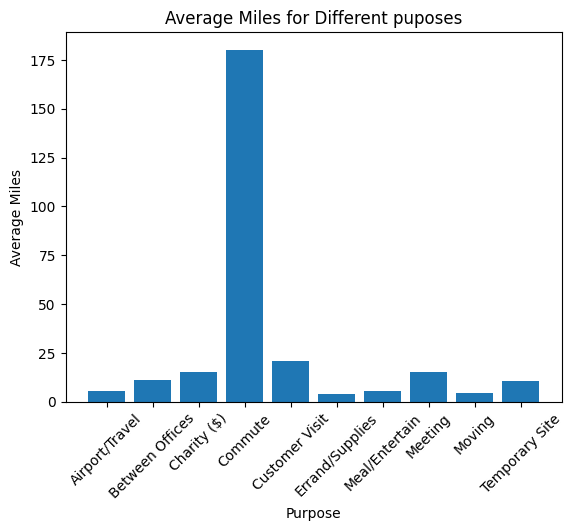

In [ ]:
#Average miles travelled for different purpose
plt.bar(average_distance_travelled.index , average_distance_travelled.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Different puposes')
plt.xticks(rotation=45)
plt.show()

**Type of passengers Category wise**

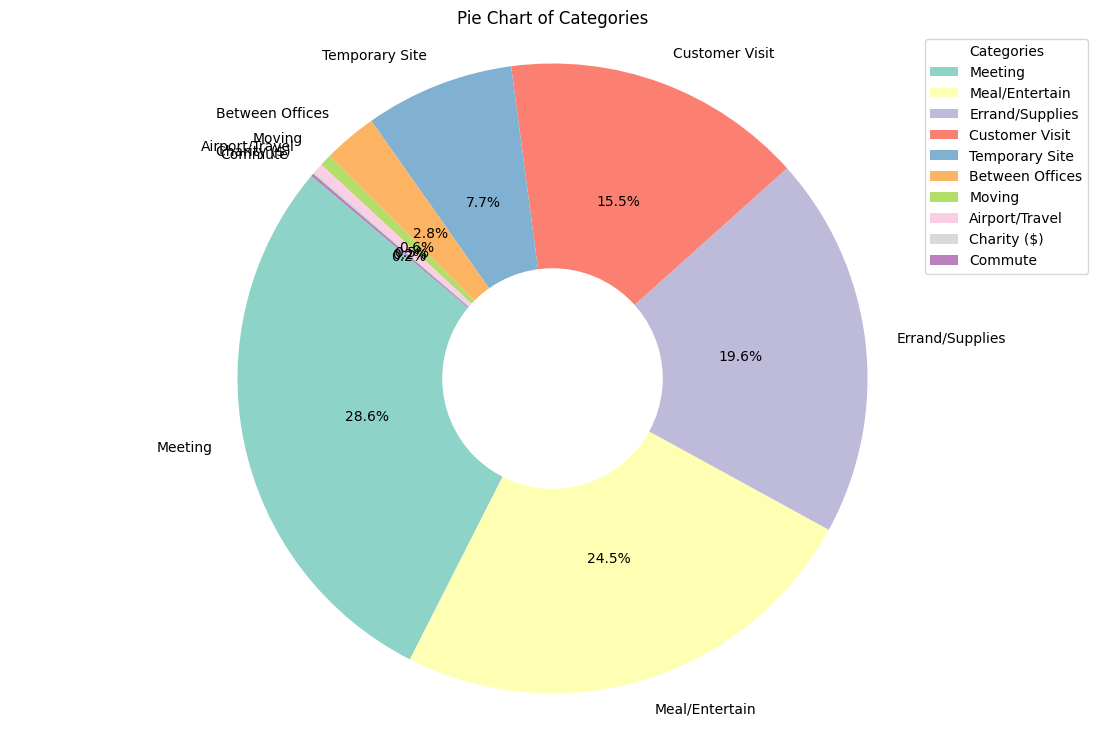

In [ ]:
#count the occurrences of each category
cc=df['PURPOSE'].value_counts()

#Data for the pie chart
sizes=cc.values
labels=cc.index
colors=plt.cm.Set3.colors #choose a colormap

# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')#Equal aspect ratio ensures the pie chartiscircular

#adding white circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.35,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(labels,title='Categories',loc='best')
plt.title('Pie Chart of Categories')
plt.show()

In [ ]:
purpose =df['PURPOSE'].value_counts()
purpose

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

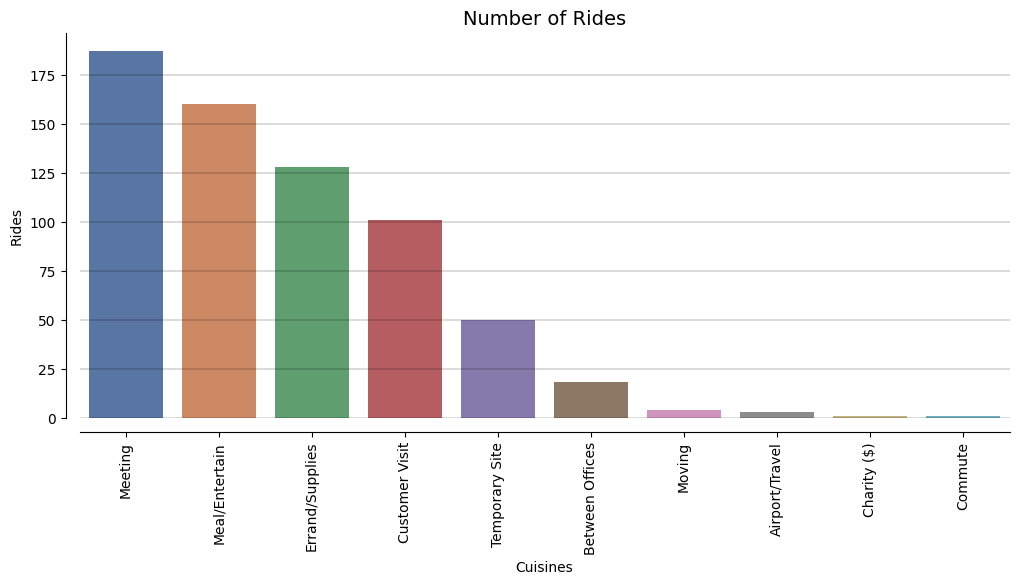

In [ ]:
c = df.PURPOSE.value_counts().reset_index().rename({'index':'PURPOSE','PURPOSE':'frequency'}, axis =1)

plt.figure(figsize=(12,5))

#color of graph
sns.barplot(data = c.head(20),
           x='PURPOSE',
           y = 'frequency',
           palette= "deep",
          )


#differentiating lines
plt.grid(True, axis = 'y',
         color = 'black',
         linestyle = '-',
         linewidth=0.2
        )

plt.grid(False, axis = 'x')

#rotate the x-axis labels
sns.despine(offset=10, trim=False)
plt.xticks(rotation = 90)

#fontsize
plt.xlabel("Cuisines", fontsize = 10)
plt.ylabel("Rides", fontsize = 10)
plt.title('Number of Rides', fontsize = 14)
plt.show()

In [ ]:
average_miles_by_category = df.groupby('CATEGORY')['MILES'].mean()
average_miles_by_category

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

In [ ]:
#least 5 satations
least_5_sations=df['START'].value_counts().nsmallest(5)
least_5_sations

NOMA             1
Santa Clara      1
Sunnyside        1
Wake Co.         1
Fuquay-Varina    1
Name: START, dtype: int64

In [ ]:
#least 5 stop satations
least_5_sations=df['STOP'].value_counts().nsmallest(5)
least_5_sations

Arlington Park at Amberly    1
Pontchartrain Beach          1
Washington                   1
St Thomas                    1
Summerwinds                  1
Name: STOP, dtype: int64

**Performance of top start and stop stations**

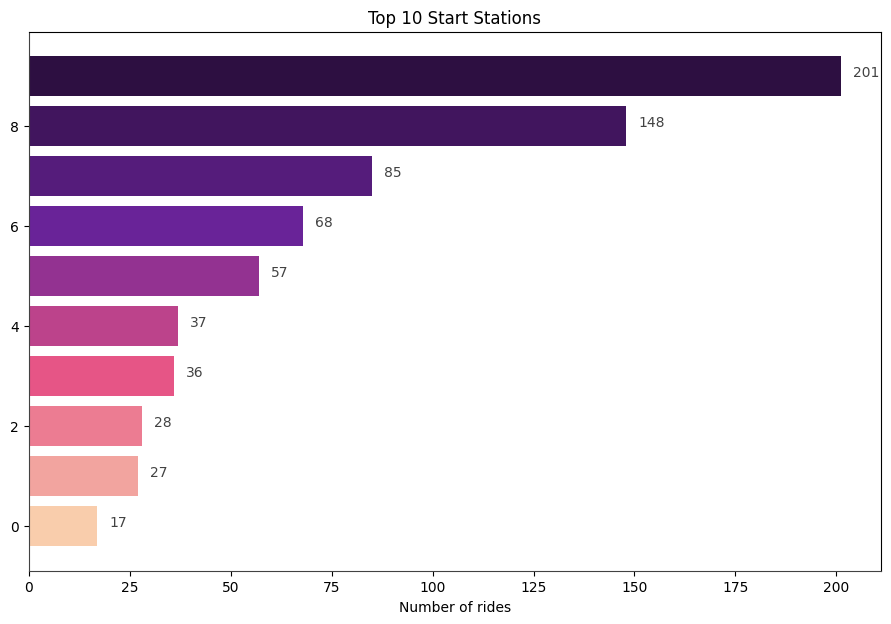

In [ ]:
top10_startstations = df["START"].value_counts()[:10].sort_values(ascending=True)

height = top10_startstations.values
bars = top10_startstations.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible("#424242")
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)

plt.xlabel("Number of rides")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Start Stations")


plt.show()

In [ ]:
top10_startstations

Westpark Place       17
Kar?chi              27
Raleigh              28
Lahore               36
Durham               37
Islamabad            57
Whitebridge          68
Morrisville          85
Unknown Location    148
Cary                201
Name: START, dtype: int64